### GeomStats Overview 

In [1]:
import os
import sys
import warnings
import pandas as pd



import geomstats.backend as gs

gs.random.seed(2020)

INFO: Using autograd backend


In [2]:
import matplotlib.pyplot as plt

import autograd as ad
import numpy as np
import geomstats.backend as gs
import geomstats.visualization as visualization
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

np.random.seed(1)
gs.random.seed(1000)

Create a hypersphere (locally similar to euclidean 2 space)

In [3]:
from geomstats.geometry.hypersphere import Hypersphere
sphere = Hypersphere(dim=2)

print(f"The dimension of the sphere is {sphere.dim}")

The dimension of the sphere is 2


Check whether particular points exist within our manifold

In [4]:
sphere.belongs(gs.array([0, 0, 1]))

True

Generate a random point

In [5]:
points=np.array([])
n=100
for i in range(0,n):
    rp=Hypersphere.random_point(sphere)
    points=np.append(points,rp)
    

points=points.reshape(n,3)

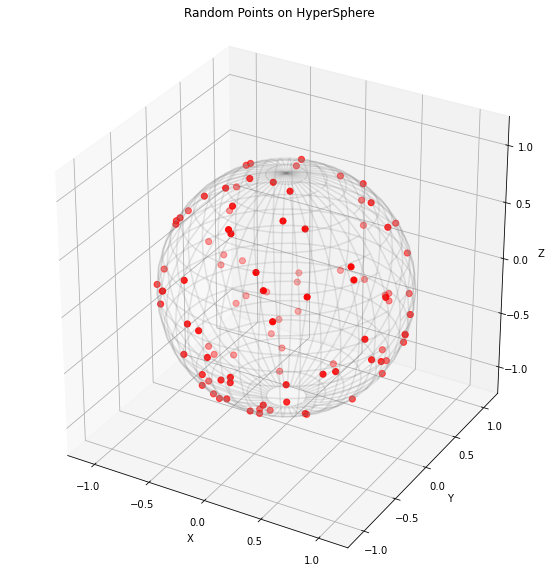

In [6]:
fig = plt.figure(figsize=(10, 10))


ax = visualization.plot(points, space="S2", marker=".", color="red",s=150)


ax.set_title("Random Points on HyperSphere")
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])

Products of Manifolds specifically two hyperspheres

In [7]:
from geomstats.geometry.product_manifold import ProductManifold
sphere1 = Hypersphere(dim=2)

sphere2 = Hypersphere(dim=2)


product_of_two_spheres = ProductManifold([sphere1, sphere2])

In [8]:
product_of_two_spheres.random_point()

array([ 0.2362944 , -0.87316183,  0.42632544,  0.31230117,  0.91675841,
       -0.24904216])

### Euclidean Space
- Randomly sample (uniform dist) points in Euclidean Space

In [9]:
from geomstats.geometry.euclidean import Euclidean

dim = 2
n_samples = 50

euclidean = Euclidean(dim=dim)

points_in_linear_space = euclidean.random_point(n_samples=n_samples)


linear_mean = gs.sum(points_in_linear_space, axis=0) / n_samples
print("Mean of points:\n", linear_mean)


Mean of points:
 [-0.00911215  0.10312333]


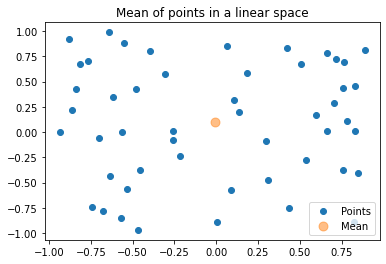

In [10]:


fig = plt.figure()
ax = plt.axes()

ax.scatter(points_in_linear_space[:, 0], points_in_linear_space[:, 1],label="Points")


ax.scatter(
    gs.to_numpy(linear_mean[0]),
    gs.to_numpy(linear_mean[1]),
   
    label="Mean",
    s=80,
    alpha=0.5,
)

ax.set_title("Mean of points in a linear space")
ax.legend();

Let's investigate our space a bit more, we can take the inner product between two vector in Euclidean space

In [11]:
a=points_in_linear_space[0]
b=points_in_linear_space[1]
print(a,b)
ip=euclidean.metric.inner_product(a,b)
print('Inner Product is', ip)

[-0.61450357  0.34522446] [0.66371199 0.01451325]
Inner Product is -0.40284306098770745


In [12]:
euclidean.metric.metric_matrix() # ip matrix

array([[1., 0.],
       [0., 1.]])

Compute the norm... which norm?

In [13]:
euclidean.metric.norm(a)

0.7048365536711028

### Hypersphere

However what happens if data isn't inherently linear, what if the data follows a nonlinear coordinate system

Visualizing data on hypersphere (embedded n+1 Euclidean Space)

In [14]:
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=dim)
points_in_manifold = sphere.random_uniform(n_samples=n_samples)


linear_mean = gs.sum(points_in_manifold, axis=0) / n_samples
print("Mean of points:\n", linear_mean)

Mean of points:
 [0.00672605 0.02202963 0.02749269]


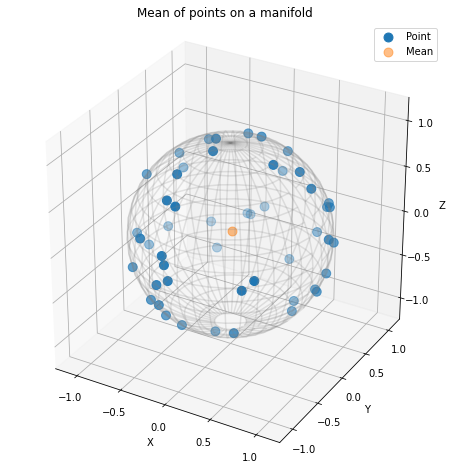

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

visualization.plot(points_in_manifold, ax=ax, space="S2", label="Point", s=80)



ax.scatter(
    linear_mean[0], linear_mean[1], linear_mean[2], label="Mean", s=80, alpha=0.5
)

ax.set_title("Mean of points on a manifold")
ax.legend();

In [16]:
c=sphere.random_point()
d=sphere.random_point()
print("Geodesic Distance is", sphere.metric.dist(c,d))

Geodesic Distance is 0.7662793868355708


In [17]:
sphere.metric.metric_matrix()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])